20153029 Minji Kim

# K-means clustering

1. Apply K-means clustering to MNIST training dataset with different K = 5, 10, 15, 20 and present the following results for each K.
2. Visualize K centroid images for each category.
3. Plot the training energy per optimization iteration.
4. Plot the training accuracy per optimization iteration.
5. Plot the testing accuracy per optimization iteration.


# Energy

$$\sum_{k = 1}^K \| x_i - c_{k_i} \|^2$$
where $k_i$ denotes the category of $x_i$, and $c_{k_i}$ denotes the centroid of category $x_i$.


# Accuracy

$$\frac{\sum_{k = 1}^K m_k}{N}$$
where $N$ denotes the total number of data, and $m_k$ denotes the number of data with majority for category $k$.




# Implementing in Python

## Training dataset - K centroid images, Energy, Accuracy

### K = 5
Due to program capacity and performance issues, I saved the image and printed it out.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import random
from collections import Counter

file_data		= "mnist_train.csv"
handle_file	= open(file_data, "r")
data        		= handle_file.readlines()
handle_file.close()

size_row	= 28    # height of the image
size_col  	= 28    # width of the image

num_image	= len(data)
count       	= 0     # count for the number of images


#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)


#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)


#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1





#
# k-mean fuction
#

def getRandomCentroids(k):
    return list_image[:, random.sample(range(num_image),k)]

def getLabelsAndEnergy(list_image, centroids, k):
    labels  = np.empty(num_image, dtype=int)
    energy  = 0
    for i in range(num_image):
        d = []
        for j in range(k):
            d.append(distance(list_image[:,i], centroids[:,j]))
        labels[i] = np.argmin(d)
        energy += np.min(d)
    return labels, energy


def getCentroidsAndAccuracy(list_image, list_label, labels, k):
    idx = np.argsort(labels)
    labels = labels[idx]
    list_label = list_label[idx]
    list_image = list_image[:,idx]
    
    label_count = [0,]
    result = Counter(labels)
    for i in range(k):
        label_count.append(result[i])
        
    label_cumsum = []
    label_cumsum = np.cumsum(label_count)
    centroids  = np.empty((size_row * size_col, k), dtype=float)
    accuracy = 0
    for i in range(k):
        centroids[:,i] = np.sum(list_image[:,label_cumsum[i]+1:label_cumsum[i+1]],axis=1)/label_count[i+1]
        accuracy += max(Counter(list_label[label_cumsum[i]+1:label_cumsum[i+1]]).values())
    return centroids, accuracy


def kmeans(list_label,list_image, k):
	
    # Initialize centroids randomly
    centroids = getRandomCentroids(k)
    
    iterations = 0
    energies = []
    accuracies = []
    oldCentroids = None
    
    # Run the main k-means algorithm
    while not np.all(oldCentroids == centroids):
        oldCentroids = centroids
        iterations += 1
        
        # Assign labels to each datapoint based on centroids and compute energies
        labels, energy = getLabelsAndEnergy(list_image, centroids, k)
        energies.append(energy)
        
        # Assign centroids based on datapoint labels and compute energies
        centroids, accuracy = getCentroidsAndAccuracy(list_image, list_label, labels, k)
        accuracies.append(accuracy / num_image)
        
    return centroids, iterations, energies, accuracies



#
# Plot
#

k = 5
centroids  = np.empty((size_row * size_col, k), dtype=float)
iterations = 0
energies = np.empty(100, dtype=float)
accuracies = np.empty(100, dtype=float)
centroids, iterations, energies, accuracies = kmeans(list_label, list_image, k)


f1 = plt.figure()

for i in range(k):

    label       = i
    im_vector   = centroids[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(k/5, 5, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

f1.savefig('Training_K5_Centroids.png')


x_axis = range(1,iterations+1)
y1_axis = energies

f2 = plt.figure()
plt.title('Energy per optimization iteration')
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.scatter(x_axis, y1_axis)
f2.savefig('Training_K5_Energy.png')


y2_axis = accuracies

f3 = plt.figure()
plt.title('Accuracy per optimization iteration')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.scatter(x_axis, y2_axis, color = 'r')
f3.savefig('Training_K5_Accuracy.png')

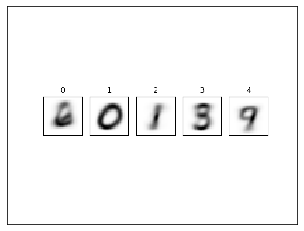

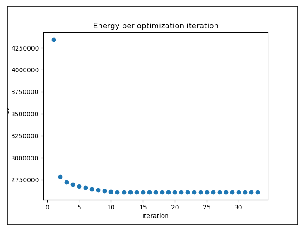

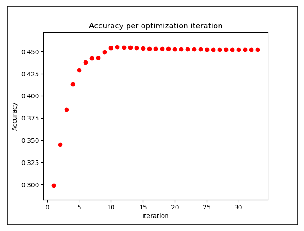

In [26]:
import matplotlib.pyplot as plt
from PIL import Image

#
def image(file):
    plt.figure()
    im = Image.open(file)
    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    imshow(im)
    
f1 = 'Training_K5_Centroids.png'
f2 = 'Training_K5_Energy.png'
f3 = 'Training_K5_Accuracy.png'
image(f1)
image(f2)
image(f3)

### K = 10
In the above code, i only change the value of k.

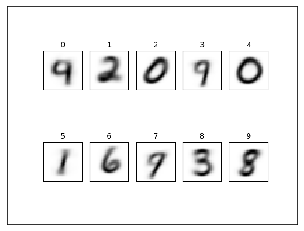

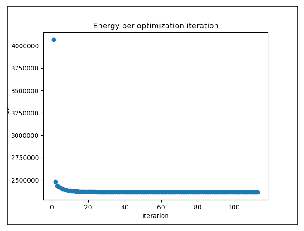

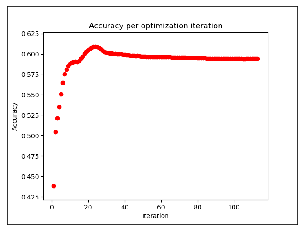

In [27]:
f1 = 'Training_K10_Centroids.png'
f2 = 'Training_K10_Energy.png'
f3 = 'Training_K10_Accuracy.png'
image(f1)
image(f2)
image(f3)

### K = 15
In the above code, i only change the value of k.

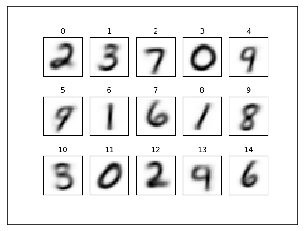

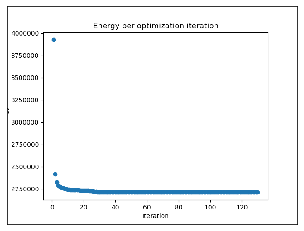

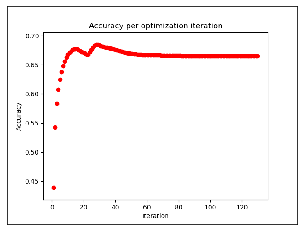

In [28]:
f1 = 'Training_K15_Centroids.png'
f2 = 'Training_K15_Energy.png'
f3 = 'Training_K15_Accuracy.png'
image(f1)
image(f2)
image(f3)

### K = 20
In the above code, i only change the value of k.

In [ ]:
f1 = 'Training_K20_Centroids.png'
f2 = 'Training_K20_Energy.png'
f3 = 'Training_K20_Accuracy.png'
image(f1)
image(f2)
image(f3)

## Testing dataset - K centroid images, Accuracy

### K = 5

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import random
from collections import Counter

file_data		= "mnist_test.csv"
handle_file	= open(file_data, "r")
data        		= handle_file.readlines()
handle_file.close()

size_row	= 28    # height of the image
size_col  	= 28    # width of the image

num_image	= len(data)
count       	= 0     # count for the number of images


#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)


#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)


#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1





#
# k-mean fuction
#

def getRandomCentroids(k):
    return list_image[:, random.sample(range(num_image),k)]

def getLabelsAndEnergy(list_image, centroids, k):
    labels  = np.empty(num_image, dtype=int)
    energy  = 0
    for i in range(num_image):
        d = []
        for j in range(k):
            d.append(distance(list_image[:,i], centroids[:,j]))
        labels[i] = np.argmin(d)
        energy += np.min(d)
    return labels, energy


def getCentroidsAndAccuracy(list_image, list_label, labels, k):
    idx = np.argsort(labels)
    labels = labels[idx]
    list_label = list_label[idx]
    list_image = list_image[:,idx]
    
    label_count = [0,]
    result = Counter(labels)
    for i in range(k):
        label_count.append(result[i])
        
    label_cumsum = []
    label_cumsum = np.cumsum(label_count)
    centroids  = np.empty((size_row * size_col, k), dtype=float)
    accuracy = 0
    for i in range(k):
        centroids[:,i] = np.sum(list_image[:,label_cumsum[i]+1:label_cumsum[i+1]], axis=1)/label_count[i+1]
        accuracy += max(Counter(list_label[label_cumsum[i]+1:label_cumsum[i+1]]).values())
    return centroids, accuracy


def kmeans(list_label,list_image, k):
	
    # Initialize centroids randomly
    centroids = getRandomCentroids(k)
    
    iterations = 0
    energies = []
    accuracies = []
    oldCentroids = None
    
    # Run the main k-means algorithm
    while not np.all(oldCentroids == centroids):
        oldCentroids = centroids
        iterations += 1
        
        # Assign labels to each datapoint based on centroids and compute energies
        labels, energy = getLabelsAndEnergy(list_image, centroids, k)
        energies.append(energy)
        
        # Assign centroids based on datapoint labels and compute energies
        centroids, accuracy = getCentroidsAndAccuracy(list_image, list_label, labels, k)
        accuracies.append(accuracy / num_image)
        
    return centroids, iterations, energies, accuracies



#
# Plot
#

k = 5
centroids  = np.empty((size_row * size_col, k), dtype=float)
iterations = 0
energies = np.empty(100, dtype=float)
accuracies = np.empty(100, dtype=float)
centroids, iterations, energies, accuracies = kmeans(list_label, list_image, k)


f1 = plt.figure()

for i in range(k):

    label       = i
    im_vector   = centroids[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(k/5, 5, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

f1.savefig('Testing_K5_Centroids.png')


x_axis = range(1,iterations+1)
y_axis = accuracies

f2 = plt.figure()
plt.title('Accuracy per optimization iteration')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.scatter(x_axis, y_axis, color = 'r')
f2.savefig('Testing_K5_Accuracy.png')


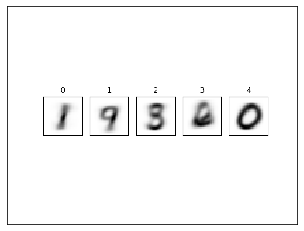

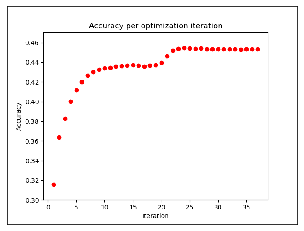

In [29]:
f1 = 'Testing_K5_Centroids.png'
f2 = 'Testing_K5_Accuracy.png'
image(f1)
image(f2)

### K = 10
In the above code, i only change the value of k.

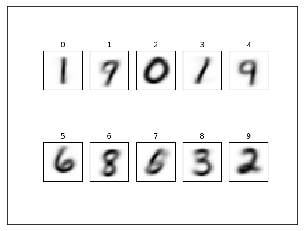

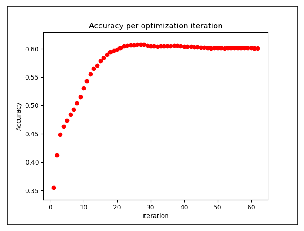

In [30]:
f1 = 'Testing_K10_Centroids.png'
f2 = 'Testing_K10_Accuracy.png'
image(f1)
image(f2)

### K = 15
In the above code, i only change the value of k.

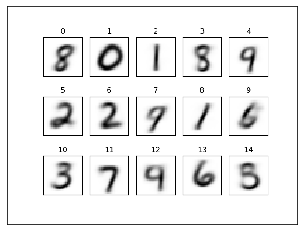

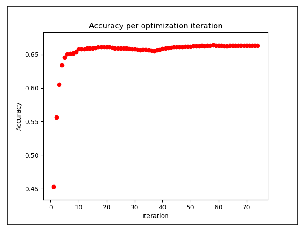

In [31]:
f1 = 'Testing_K15_Centroids.png'
f2 = 'Testing_K15_Accuracy.png'
image(f1)
image(f2)

### K = 20
In the above code, i only change the value of k.

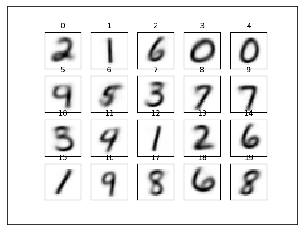

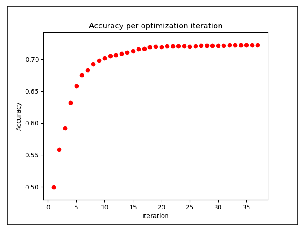

In [32]:
f1 = 'Testing_K20_Centroids.png'
f2 = 'Testing_K20_Accuracy.png'
image(f1)
image(f2)